In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
jtplot.style(figsize=(24, 9))

# VWAP. Volume-Weighted Average Price

In [15]:
df = pd.read_csv('../../../data/order_book/BAC.csv',
                 index_col=0, parse_dates=True)
df.head()

,Bid,Ask,Last,Volume,Type
Time,,,,,
2023-03-08 15:06:21.582,32.85,32.86,32.85,2101.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell
2023-03-08 15:06:21.582,32.85,32.86,32.85,400.0,Sell


In [16]:
df.shape

(100000, 5)

In [17]:
df['Volume'].is_monotonic_increasing

False

In [18]:
df.dtypes

Bid       float64
Ask       float64
Last      float64
Volume    float64
Type       object
dtype: object

In [19]:
df.index.inferred_type

'datetime64'

In [20]:
df.groupby('Type').count()

,Bid,Ask,Last,Volume
Type,,,,
Buy,61655,61655,61655,61655
Buy/Sell,91,91,91,91
Sell,38254,38254,38254,38254


In [21]:
df['price'] = df['Last'] * df['Volume']

In [22]:
df.head()

,Bid,Ask,Last,Volume,Type,price
Time,,,,,,
2023-03-08 15:06:21.582,32.85,32.86,32.85,2101.0,Sell,69017.85
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell,3285.00
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell,3285.00
2023-03-08 15:06:21.582,32.85,32.86,32.85,100.0,Sell,3285.00
2023-03-08 15:06:21.582,32.85,32.86,32.85,400.0,Sell,13140.00


In [23]:
# VWAP = (Сумма (Цена * Объём) для каждой сделки) / (Суммарный объём за период)
df['price'].sum() / df['Volume'].sum()

32.52237099767282

In [24]:
buy = df[df['Type']=='Buy'].copy()
buy.drop('Type', axis=1, inplace=True)

sell = df[df['Type']=='Sell'].copy()
sell.drop('Type', axis=1, inplace=True)

In [25]:
buy['CumulativePrice'] = buy['price'].cumsum()
buy['CumulativeVolume'] = buy['Volume'].cumsum()
buy['VWAP'] = buy['CumulativePrice'] / buy['CumulativeVolume']

sell['CumulativePrice'] = sell['price'].cumsum()
sell['CumulativeVolume'] = sell['Volume'].cumsum()
sell['VWAP'] = sell['CumulativePrice'] / sell['CumulativeVolume']

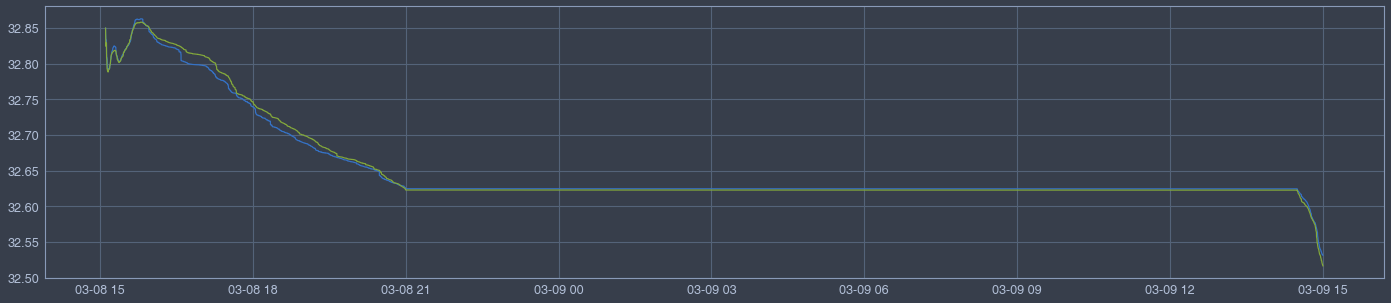

In [29]:
plt.figure(figsize=(24, 5))
plt.plot(sell['VWAP'])
plt.plot(buy['VWAP'])

In [13]:
target_volume = 2 # lot
duration_sec = 30

start_time = df.loc['2023-03-08 15:06'].iloc[0].name
end_time = start_time + pd.Timedelta(seconds=30)

start_time, end_time

(Timestamp('2023-03-08 15:06:21.945000'),
 Timestamp('2023-03-08 15:06:51.945000'))

In [14]:
period_data = df.loc[
    (df.index>=start_time) &
    (df.index<=end_time)
].copy()

period_data.head()

,Bid,Ask,Last,Volume,price
Time,,,,,
2023-03-08 15:06:21.945,32.84,32.85,32.85,200.0,6570.00
2023-03-08 15:06:26.047,32.83,32.84,32.84,100.0,3284.00
2023-03-08 15:06:26.872,32.83,32.84,32.84,100.0,3284.00
2023-03-08 15:06:27.591,32.83,32.84,32.84,1601.0,52576.84
2023-03-08 15:06:29.501,32.82,32.83,32.83,200.0,6566.00


In [15]:
period_data['time_index'] = np.round((period_data.index-start_time).total_seconds(), 3)

period_data.head()

,Bid,Ask,Last,Volume,price,time_index
Time,,,,,,
2023-03-08 15:06:21.945,32.84,32.85,32.85,200.0,6570.00,0.000
2023-03-08 15:06:26.047,32.83,32.84,32.84,100.0,3284.00,4.102
2023-03-08 15:06:26.872,32.83,32.84,32.84,100.0,3284.00,4.927
2023-03-08 15:06:27.591,32.83,32.84,32.84,1601.0,52576.84,5.646
2023-03-08 15:06:29.501,32.82,32.83,32.83,200.0,6566.00,7.556
